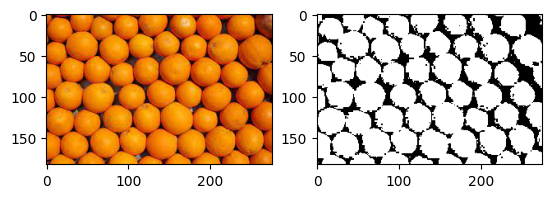

In [1337]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

url = 'Dataset\Orange_5.png'
img = cv2.imread(url)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# lowerHSV = [10,100,170]
# UpperHSV = [25,255,255]

lowerHSV = [10,0,165]
UpperHSV = [25,255,255]

mask =cv2.inRange(hsv,np.array(lowerHSV),np.array(UpperHSV))

plt.subplot(1,2,1)
plt.imshow(rgb,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mask,cmap='gray')

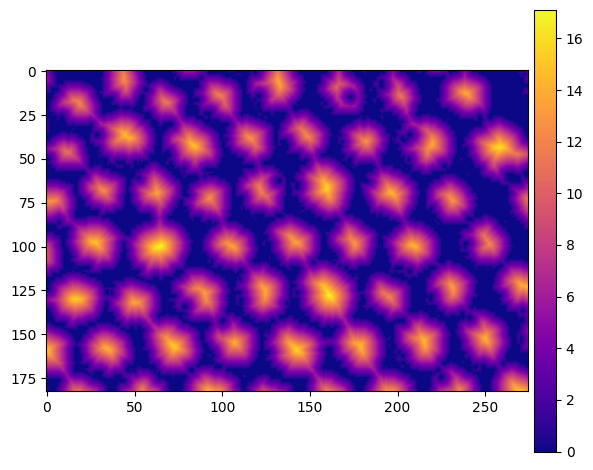

In [1338]:
DT = cv2.distanceTransform(mask,cv2.DIST_L2,3) #ใช้เพื่อดูว่าส่วนไหนลึกจากขอบแค่ไหน
plt.imshow(DT,cmap='plasma')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

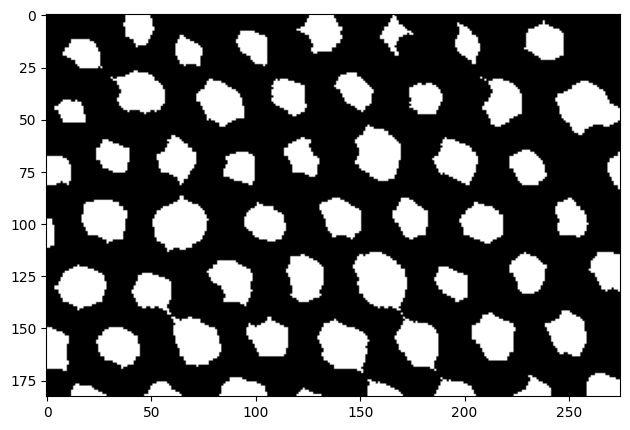

In [1351]:
Object = np.where(DT>DT.max()*0.35,1,0) #คัดเฉพาะส่วนที่ห่างจากขอบซึ่งก็จะเป็นส่วนที่เป็นวัตถุแน่ๆ
BG = np.where(DT==0,1,0)  #เราแยกตัวความลึก0 ให้เป็นBackgroundสีดำ
plt.imshow(Object,cmap='gray')
plt.tight_layout()
plt.show()

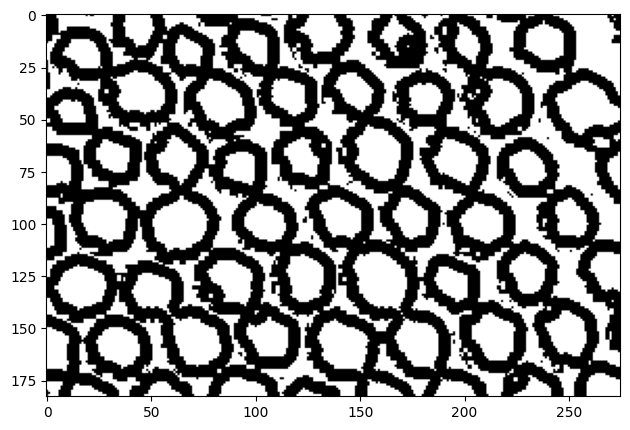

In [1340]:
corner = (Object+BG).astype(np.uint8) #จากนั้นเราก็รวมBackground กับ Object(เราก็จะได้ขอบ)
plt.imshow(corner,cmap='gray')
plt.tight_layout()
plt.show()

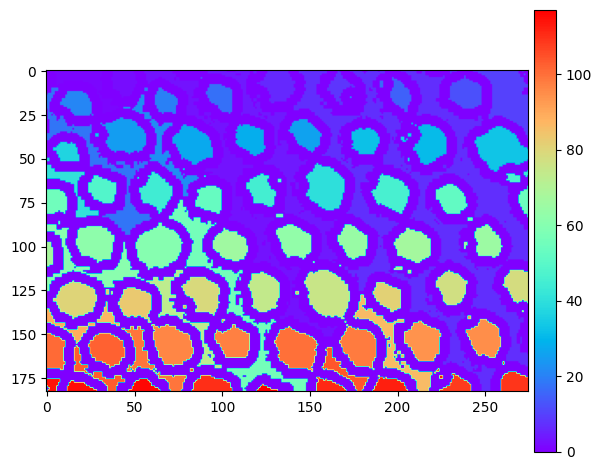

In [1341]:
n,lek = cv2.connectedComponents(corner)#ใช้เพื่อได้บริเวณของวัตถุและฉากหลังแยกกันทั้งหมด
plt.imshow(lek,cmap='rainbow')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

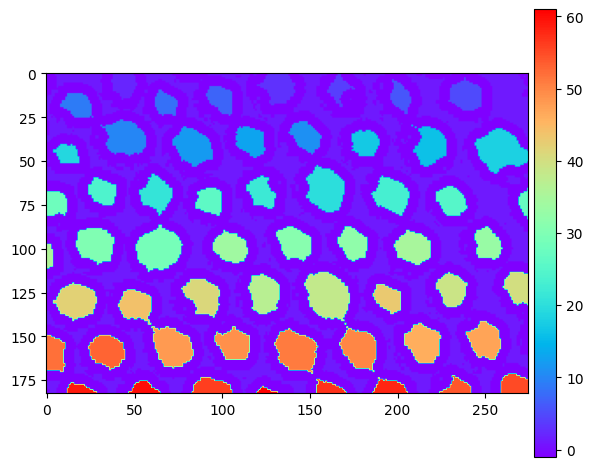

In [1343]:
#เนื่องจากฉากหลังถูกแยกย่อยออกมาหมดเลย เราจะทำให้มันกลับมาเป็นอันเดียว
lek += 2 #เพิ่มทุกอย่าง2 เพื่อให้แน่ใจว่าทุกตัวเป็นสองขึ้น
lek[BG==1] = 1 #กำหนดให้ฉากหลังเป็น 1
lek[corner==0] = -1 #กำหนดให้รอยต่อเป็น -1
for i,n in enumerate(np.unique(lek)[1:],1): #จัดเรียงตัวเลขใหม่ให้ไล่ตั้งแต่ 2 ไปโดยไม่เว้นค่าไหนไป เสร็จแล้วก็จะได้แบบนี้
    lek[lek==n] = i

plt.imshow(lek,cmap='rainbow')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

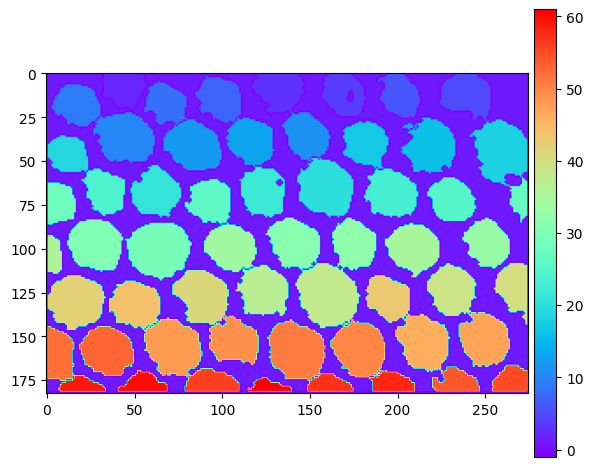

In [1344]:
lek = cv2.watershed(rgb,lek)
plt.imshow(lek,cmap='rainbow')
plt.colorbar(pad=0.01)
plt.tight_layout()
plt.show()

number of Orange(s) = 60


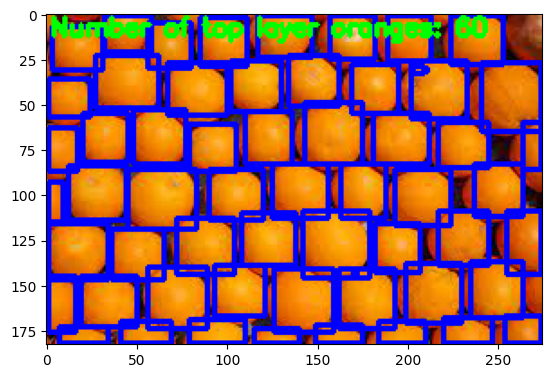

In [1345]:
contour = []
for i in range(2,lek.max()+1): #เริ่มที่ 2 เพราะเราไม่เอา Background
    c,_ = cv2.findContours((lek==i).astype(np.uint8),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if c:  # Check if any contours were found
        contour.append(c[0])

areas = []
for i in range(len(contour)):
    a = cv2.contourArea(contour[i])
    areas.append(a)
    # print("index:", i, "area:", a)
    x,y,w,h = cv2.boundingRect(contour[i])
    cv2.rectangle(rgb,(x,y),(x+w,y+h),(0,0,255),thickness=2)

print("number of Orange(s) =", len(contour))
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = min(rgb.shape[0], rgb.shape[1]) / 400.0  # Adjusting font
text_position = (int(rgb.shape[1] * 0.01), int(rgb.shape[0] * 0.07))
cv2.putText(rgb, f'Number of top layer oranges: {len(contour)}', text_position, font, font_scale, (0, 255, 0), 2)
plt.imshow(rgb)

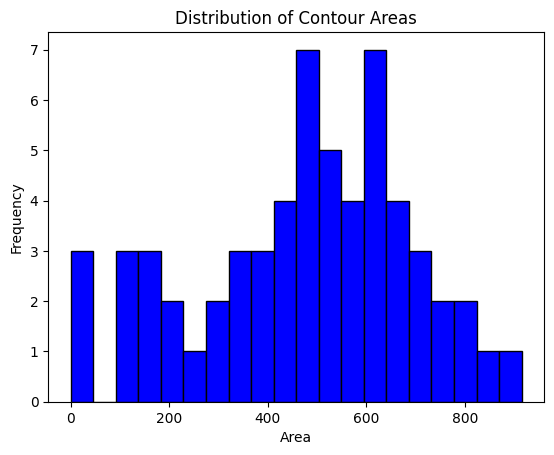

In [1346]:
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Contour Areas')
plt.show()

In [1347]:
# Calculate mean and standard deviation of contour areas
mean_area = np.mean(areas)
std_area = np.std(areas)

# Define thresholds based on mean and standard deviation
below_threshold = mean_area -  std_area
above_threshold = mean_area +  std_area

# Classify areas into small, medium, and large
small_areas = [area for area in areas if area <= below_threshold]
medium_areas = [area for area in areas if below_threshold <= area <= above_threshold]
large_areas = [area for area in areas if area > above_threshold]

# Output number of surface  oranges in each class
print("Number of small Oranges:", len(small_areas))
print("Number of medium Oranges:", len(medium_areas))
print("Number of large Oranges:", len(large_areas))

Number of small Oranges: 12
Number of medium Oranges: 39
Number of large Oranges: 9


Number of small Oranges: 48
Number of medium Oranges: 156
Number of large Oranges: 36


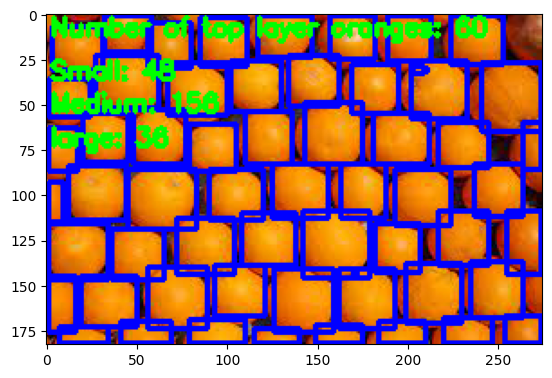

In [1348]:
#average diameters for oranges ranging from 2.29 inches(5.8166cm) to 3.47 inches(8.8138cm), the avereage's average would be 7.3152cm
#Calculating number of oranges using volume_basket/volume_orange would not be pratical cus of the space between the orange. So,I use layer instead(assuming the basket was rectangular or cylindrical)
height = 30 #assuming height in centimeter
diameter = 7.3152 #average orange's diameters 
layer = int(height//diameter) #we don't want any decimal

print("Number of small Oranges:", len(small_areas)*layer)
print("Number of medium Oranges:", len(medium_areas)*layer)
print("Number of large Oranges:", len(large_areas)*layer)

S_text_position = (int(rgb.shape[1] * 0.01), int(rgb.shape[0] * 0.2))
M_text_position = (int(rgb.shape[1] * 0.01), int(rgb.shape[0] * 0.3))
L_text_position = (int(rgb.shape[1] * 0.01), int(rgb.shape[0] * 0.4))
cv2.putText(rgb, f'Small: {len(small_areas)*layer}', S_text_position, font, font_scale, (0, 255, 0), 2)
cv2.putText(rgb, f'Medium: {len(medium_areas)*layer}', M_text_position, font, font_scale, (0, 255, 0), 2)
cv2.putText(rgb, f'large: {len(large_areas)*layer}', L_text_position, font, font_scale, (0, 255, 0), 2)
plt.imshow(rgb)